# GoFundMe Fraud Detection Model

In [5]:
import sys
sys.path.append('../src')
from preprocess import load_and_merge_data, preprocess_data
from model import train_model, evaluate_model, save_artifacts
from utils import add_text_features, generate_report

import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
train, test = load_and_merge_data()
X_train, y_train, X_test, y_test, scaler, features = preprocess_data(train, test)

100%|██████████| 25000/25000 [00:00<00:00, 155093.46it/s]


AUC-ROC: 0.838
              precision    recall  f1-score   support

           0       0.85      0.50      0.63     12472
           1       0.65      0.91      0.76     12528

    accuracy                           0.71     25000
   macro avg       0.75      0.71      0.70     25000
weighted avg       0.75      0.71      0.70     25000



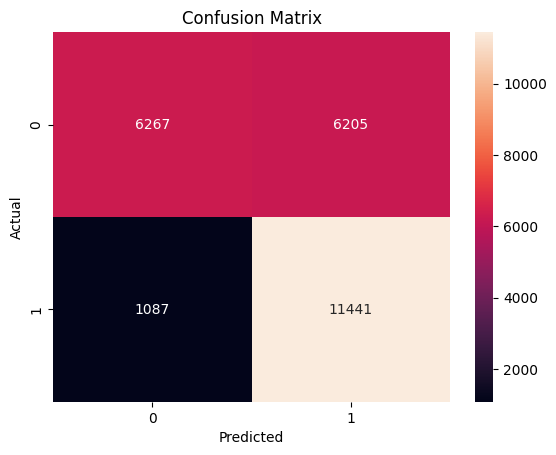

<Figure size 1000x600 with 0 Axes>

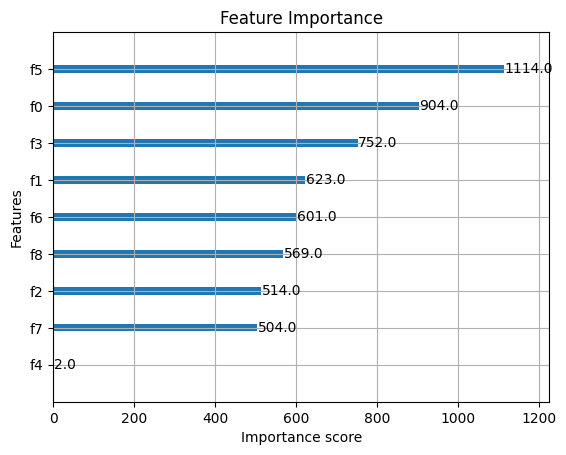

In [7]:
model = train_model(X_train, y_train)
y_pred = evaluate_model(model, X_test, y_test, features)

AUC-ROC: 0.889
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     12472
           1       0.71      0.92      0.80     12528

    accuracy                           0.77     25000
   macro avg       0.80      0.77      0.77     25000
weighted avg       0.80      0.77      0.77     25000



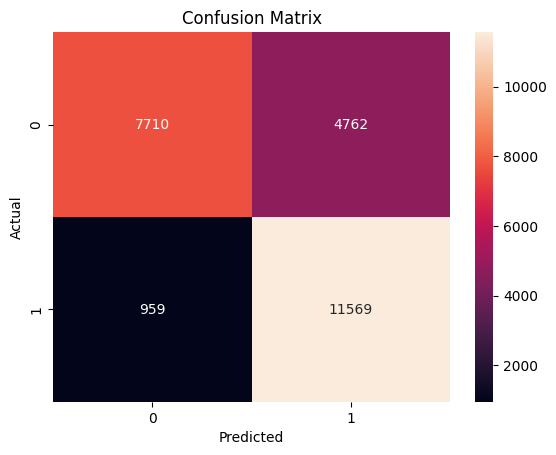

<Figure size 1000x600 with 0 Axes>

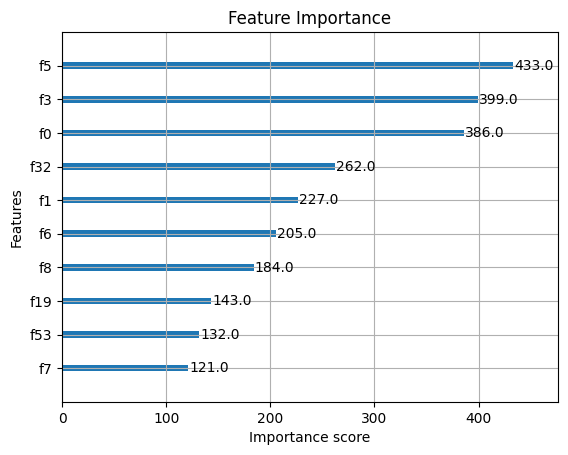

In [ ]:
# Add text features\n
X_train_full, X_test_full, _ = add_text_features(
    X_train, X_test,
    train['clean_description'], 
    test['clean_description'])

# Train text-enhanced model\n",
text_model = train_model(X_train_full, y_train)
y_pred_text = evaluate_model(text_model, X_test_full, y_test, features)

In [9]:
save_artifacts(model, scaler, features)

In [10]:
# Generate reports
report = generate_report(y_test, y_pred)
print(report)

   precision    recall        f1  threshold
0   0.648362  0.913234  0.758335        0.5
